

# <span style="color:red"> Applying Principal Component Analysis (PCA) to an Image data
</span>

#### <span style="color:brown"> Authors : Sivaprasad Puthumadthil rameshan nair </span>

<br>

## Aim:

Leverge the concepts of Linear algebra and apply Principal Component Analysis to compress an image data by reducing the dimensionality of the image.


<br>


#### The need of doing PCA :

PCA is used to reduce the storage and transmission requirements of images by mainting important information.It can also be used to reduce the noice of the data and thus all these compute to a fast image processing.

<br>

#### The various steps involved in the project are :

    - Loading and representation of the image data 
    - Data preprocessing - Flatten and Standardize the Image matrix
    - Implement and Apply PCA from Scratch
    - Constructing the image after the reduction
    - Visualising results
    
<br>

#### Concepts used :

Matrix , Mean, standard deviation, standardization,  vectors , eigenvalues, eigenvectors, dot product and pca.

<br>
    
## Data :

The image data used for this project is "barbara"


<br>
<br>

## <span style="color:blue">1.Loading and representation of the image data </span>

<br>

In this step we will load the image data and represent the image as a 2 dimensional matrix. An image is nothing but a matrix of pixel values.Here the 2 dimensions means the width and hieght of the image. 

since we are using grayscale image each pixel is represented by a single vlaue that denotes the intensity of light from 0 to 255 ,where 0 is black and 255 is white.


<br>
<br>



Text(0, 0.5, 'Row')

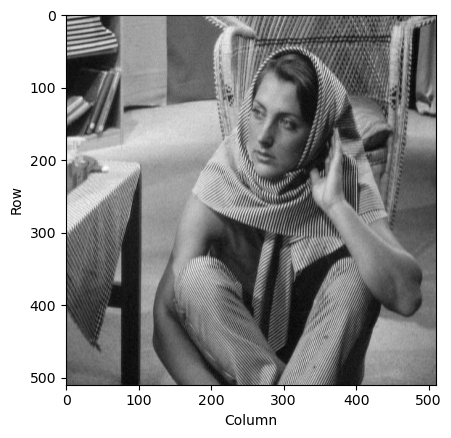

In [2]:
# import all the required libraries 

import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# load the image that needs to be compressed and plot the image

image_url = 'C:\\Users\\puthu\\siva\\EPITA\\S1\\Linear Algebra for data science\\Final Project\\barbara.jpg'
image = io.imread(image_url)
plt.imshow(image, cmap='gray')

plt.xlabel('Column')
plt.ylabel('Row')

In [3]:
# a grayscale image is a numpy array of pixels which values varies from 0 to 255. so inside the matrix the value can
# only range from these values 


image_array = np.array(image)
num_rows, num_columns = image_array.shape
print(f"number of rows {num_rows} and number of coloumns {num_columns}")
print("The image as a numpy array :\n" ,image_array[0:5])
print("\n")

number of rows 510 and number of coloumns 510
The image as a numpy array :
 [[ 87  92  97 ... 107 115 116]
 [109 112 121 ... 123 128 130]
 [162 161 172 ... 136 134 142]
 [200 193 201 ... 129 125 147]
 [191 179 177 ... 111 114 150]]




<br>
<br>

## <span style="color:blue"> 2. Data preprocessing - Flatten and Standardize the Image matrix </span>
<br>

### Data Preprocessing

    If the loaded image is a coloured one , we need to convert it into grayscale. since we are using grayscale image , this step can be skipped.
<br>
##### Flatten the image matrix

    Flattening is the process of converting the 2D image matrix into 1D array.flattening helps to ease various image processing techniques and transformation. also it helps to perform matrix operations faster and easier.

<br>

In [4]:
# we can use flatten fn to convert the image to 1D


flatten_image = image.flatten()

print('shape before flattening:', image.shape)
print('shape after flattening: ',flatten_image.shape)


shape before flattening: (510, 510)
shape after flattening:  (260100,)


##### Standardize the Image matrix
<br>

    Standardization is the process of standerizing the data so that the mean of the data becames 0 and standard deviation becames 1.

    The need of standardization is to ensure that all features contribute equally to the analysis. without standardization, features with large scale might dominate the analysis.

<br>
<br>

In [5]:
# steps to do Standardization


# calculate the mean and standard deviation of the flattened data

mean = np.mean(image, axis = 0)
image = image - mean
std  = np.std(image, axis = 0)
print(f"\n The mean is: {mean} \n The std is: {std}")
std_filled = std.copy()
std_filled[std == 0] = 1.0
standardized_image = (image - mean) / std_filled


# apply Standardization formula

print(f"\n\nThe standardized_image is: \n{standardized_image}" )


 The mean is: [118.85490196 118.42941176 117.85686275 118.65490196 117.5745098
 115.14901961 116.7372549  116.11960784 115.60588235 115.04901961
 114.02156863 113.89019608 113.96666667 114.2745098  113.39215686
 114.81568627 113.69215686 113.61568627 113.67647059 114.01764706
 111.4254902  112.99019608 110.40196078 108.16666667 108.48039216
 106.95294118 106.15490196 106.47254902 103.65294118 105.79803922
 105.95490196 104.47647059 105.90980392 105.2372549  106.32352941
 108.15294118 106.94117647 106.31960784 105.21372549 103.32352941
 104.0372549  103.18039216 104.95490196 107.96666667 109.49803922
 113.53529412 114.42941176 114.95686275 115.92352941 117.21176471
 118.82156863 119.03529412 118.06666667 117.82745098 116.78039216
 117.38039216 117.10196078 115.85490196 115.56078431 114.06666667
 113.94705882 113.98431373 113.74901961 113.80392157 113.51764706
 115.72941176 116.63333333 118.65294118 121.15882353 122.03921569
 122.96666667 123.49607843 125.44117647 125.79019608 128.57450

In [6]:
# now we can check whether the mean of the standardized data becames 0 and standard deviation becames 1



stdized_mean = np.mean(standardized_image)
stdized_std  = np.std(standardized_image)
print(f"After standardization The mean is: {stdized_mean} \nThe std is: {stdized_std}")

After standardization The mean is: -2.480274650862679 
The std is: 1.4298345077834205


<br>
the value of mean is nearly zero. ( small difference from 0  is negligible and does not impact the utility of the standardized values).
the std is also near to 1.
<br>
so we can say the data is standardized.
<br>
<br>

## <span style="color:blue"> 3. Implement and Apply PCA from Scratch</span>
<br>

PCA has couple of steps involved where calculating the standardized_image was one of them, which we already did it.

The second step is to calculate the eigenvalues and eigenvectors.


##### eigenvectors and eigenvalues : 

    Consider eigenvector as an arrow in space , in which if we apply a matrix to it , it can stretch or shrink in the same direction.Eigenvalue is associated with eigenvector, where it's a number(scalar) which tells how much the eigenvector gets scaled.
    

let's try to define a function (function name : eig) for finding out both of these values. These function can be utilized once we start to apply PCA.

The function eig will return the eigenvectors and eigenvalues when a covariant_matrix is passed to it.

In [7]:
# function for calculating eig values and vectors

def eig(covariant_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariant_matrix)
    sorted_eig = np.argsort(-eigenvalues)
    eigenvalues = eigenvalues[sorted_eig]
    eigenvectors = eigenvectors[:, sorted_eig]
    
    return eigenvalues, eigenvectors


Now let's apply PCA !

even though there is an inbuilt function for applying PCA , since the aim is to apply it from scratch , so I am going to define a function to implement PCA. 


##### Various steps in PCA :

1.Calculate the <span style="color:green"> covariant matrix </span> of the image.

    The covariance matrix is a square matrix that summarizes the covariance between different variables.

    Suppose I have a data set with X and Y variables, the cov(X,Y) represents the covariance between X and Y.

    If the value is positive, then as X increases Y tends to increase as well. If it's negative, it means that as X increases, Y tends to decrease.

    so this matrix tells you how much variables vary together.


2.Get the eigenvectors and eigenvalues.

    The next step is to find out the eigenvalues and eigenvectors of the covariance matrix. as I said earlier consider eigenvectors as an arrow in space and it represent the direction in which the data varies the most and the eigenvalues tell you how much variance there is in each of these directions.

    The direction of the largest variation  in the data is indicated by the first eigenvector. It stands for the main direction of variation.The direction of the second-highest variance is indicated by the second eigenvector, and so on.
    
    Then we will select the eigenvectors and compute the dot product of selected eigenvectors and the standardized_image to obtain projection.



In [8]:
def PCA(image, num_of_components,comm):
    covariant_matrix = np.cov(image, rowvar=False)
    eigenvalues, eigenvectors = eig(covariant_matrix)
    if(comm == True ):
        print(f"\n the covariant matrix will be : {covariant_matrix}")
        print(f"\n eigenvectors: \n {covariant_matrix} \n eigenvalues \n{eigenvalues}")
    select_eigenvectors = eigenvectors[:, :num_of_components]
    proj = np.dot(standardized_image, select_eigenvectors)
    
    return proj, select_eigenvectors

##  <span style="color:blue"> 4) Constructing the image after the reduction </span>

<br>

We define a function which will be taking n as the parameter where n denotes the number of principal components that would be used for the reconstruction. 

In the next step, PCA is performed.

A pre defined funtion PCA is called which takes in standardized image and the specified number of components as its input. The function returns the eigen vectors and the projections as its output.

The PCA function is used to reduce dimensionality, at instances it can be used to extracting information from a high-dimensional space, but it is projected into a lower-dimensional sub space.

A dot product is taken between the projections and the transpose of the selected eigen vectors. A dot product is a way of combining two vectors, it could be used to tell how much two vectors point in the same direction. 

In the next step we reshape the reconstructed image.



In [15]:
def re_construct_image(n,comm):
    
    num_of_components = n

    proj, selected_eigenvectors = PCA(standardized_image, num_of_components,comm)

    reconstructed_image = np.dot(proj, selected_eigenvectors.T) * std_filled + mean
    reconstructed_image = reconstructed_image.reshape((num_rows, num_columns))
    
    return reconstructed_image

reconstructed_image = re_construct_image(50,True)


 the covariant matrix will be : [[ 1.00196464  0.95600434  0.95208593 ... -0.33432462 -0.37589633
  -0.39148561]
 [ 0.95600434  1.00196464  0.94806615 ... -0.34499101 -0.38076971
  -0.40769403]
 [ 0.95208593  0.94806615  1.00196464 ... -0.3318395  -0.35858496
  -0.38508133]
 ...
 [-0.33432462 -0.34499101 -0.3318395  ...  1.00196464  0.9696097
   0.94490555]
 [-0.37589633 -0.38076971 -0.35858496 ...  0.9696097   1.00196464
   0.96433223]
 [-0.39148561 -0.40769403 -0.38508133 ...  0.94490555  0.96433223
   1.00196464]]

 eigenvectors: 
 [[ 1.00196464  0.95600434  0.95208593 ... -0.33432462 -0.37589633
  -0.39148561]
 [ 0.95600434  1.00196464  0.94806615 ... -0.34499101 -0.38076971
  -0.40769403]
 [ 0.95208593  0.94806615  1.00196464 ... -0.3318395  -0.35858496
  -0.38508133]
 ...
 [-0.33432462 -0.34499101 -0.3318395  ...  1.00196464  0.9696097
   0.94490555]
 [-0.37589633 -0.38076971 -0.35858496 ...  0.9696097   1.00196464
   0.96433223]
 [-0.39148561 -0.40769403 -0.38508133 ...  0.9449

##  <span style="color:blue"> 5) Visualising results </span>

now we created a side-by-side comparison plot of the image using plt function. 

The original image is depicted in the first subplot 

After applying PCA, the reconstructed image is shown in the second subplot. 

In the output cell we can see that the information is retained but the dimonsionality is reduced. 


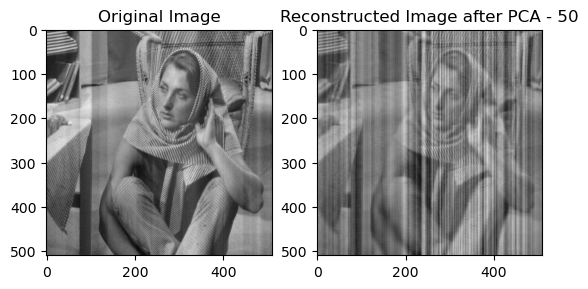

In [16]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image after PCA - 50')

plt.show()


Text(0.5, 1.0, 'Reconstructed Image after PCA - 350')

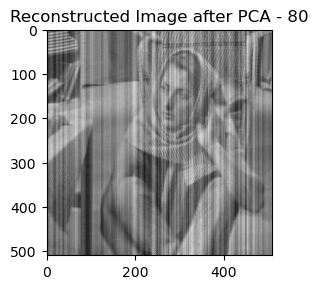

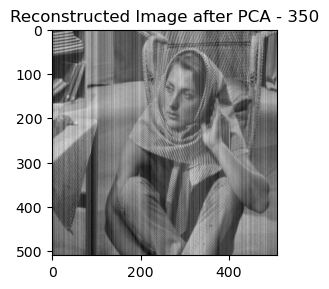

In [17]:
# Reconstructing image with different num_of_components
reconstructed_image = re_construct_image(80,False)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image after PCA - 80')

reconstructed_image = re_construct_image(350,False)
plt.figure()
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image after PCA - 350')


Observation : As you can see, more the number of principle component used , more clearer the image is after PCA

## Conclusion:


Principal Component Analysis(PCA) is used to reduce the dimensionality of images and it has been transformed into lower dimensional space. Even when transfered, the model would be able to hold on to the required information. By doing this , computational complexity is reduced significantly. This would allow faster processing and analysing of the data. It will enhance robustness: Focus on essential information is important which is necessary for more robust models and analyses.

This project helped us to apply the various concepts that we learned during the lessons of course "Linear algebra for data science"


